In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models, initializers, optimizers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# 显存自动分配
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = tf.ones((num_inputs, 1)) * 0.01, 0.05

features = tf.random.normal(shape=(n_train + n_test, num_inputs))
# dot 点乘
labels = tf.keras.backend.dot(features, true_w) + true_b
labels += tf.random.normal(mean=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [6]:
# 画图函数
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    """Plot x and log(y)."""
    # set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # semilogy 将y轴用科学计数法表示
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    plt.show()

In [3]:
def init_params():
    w = tf.Variable(tf.random.normal(mean=1, shape=(num_inputs, 1)))
    b = tf.Variable(tf.zeros(shape=(1,)))
    return [w, b]

In [4]:
num_epochs = 100
def fit_and_plot_tf2(wd, lr=1e-3):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1, 
                                    kernel_regularizer=regularizers.l2(wd), 
                                    bias_regularizer=None))
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=lr), 
                 loss=tf.keras.losses.MeanSquaredError())
    history = model.fit(train_features, train_labels, epochs=100, batch_size=1, 
              validation_data=(test_features, test_labels),
             validation_freq=1,verbose=0)
    # model.summary()
    train_ls = history.history['loss']
    test_ls = history.history['val_loss']
    # print(test_ls)
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                     range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', tf.norm(model.get_weights()[0]).numpy())


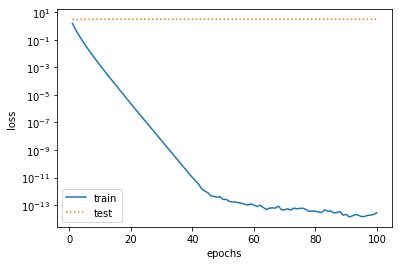

L2 norm of w: 1.44525


In [7]:
fit_and_plot_tf2(0, lr=1e-3)

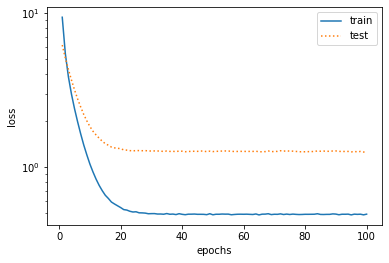

L2 norm of w: 0.34814495


In [8]:
fit_and_plot_tf2(3, lr=1e-3)